# Functions

A function takes some number of inputs, and returns some number of outputs.  Recall the keywords `def`, and `return`

In [1]:
import numpy as np

# function with no inputs
def random_float():
    return np.random.rand()

print(random_float())

# function with 1 input
def plus1(x):
    return x + 1

print(plus1(2))

# function with 2 outputs
def plus_times(a, b):
    return a + b, a * b

print(plus_times(2,3))

0.5007729527676008
3
(5, 6)


You can look up a function call signature and documentation with `help()`

In [ ]:
help(plus_times)

You can also use `?` in ipython

In [ ]:
?plus_times

If we want to provide a docstring, we can do so in the function declaration

In [ ]:
# function with 2 outputs
def plus_times(a, b):
    """
    returns a + b, a * b
    """
    return a + b, a * b

In [ ]:
?plus_times

## Keyword Arguments

You can provide keyword arguments by setting a default value

In [3]:
def kw_example(a, b=5):
    """
    returns a + b
    """
    return a + b

print(kw_example(3))

print(kw_example(3, 7))

8
10


In [ ]:
?kw_example

keyword arguments must come **after** regular arguments

In [ ]:
def kw_example(b=5, a):
    return a + b

## Unpacking

Tuple (defined via `( )`):

In [5]:
a = (1, 2, 3)
print(a)
print(a[2]) # Access element
# a[2] = 5    # Not mutable

(1, 2, 3)
3


TypeError: 'tuple' object does not support item assignment

Dictionary (defined via `{ }`):

In [6]:
a = {'First item': 1, 'Second item': 'Apple'}   #{'Name1': Value1, 'Name2': Value2}
print(a)
print(a['First item']) # Access element by name
# print(a[0]) # Wrong way to access

{'First item': 1, 'Second item': 'Apple'}
1


In Python, it is common to see function calls of the form

In [7]:
def myfun(*args, **kwargs):
    """
    Function that prints arguments and keyword arguments
    """
    print(args)
    print(kwargs)
    return

`args` is a tuple containing the arguments.

`kwargs` is a dict containing keyword arguments. 

In [8]:
myfun(1,2, c=3, dog='cat')

(1, 2)
{'c': 3, 'dog': 'cat'}


You can also unpack containers in other contexts

In [9]:
a = [1,2,3]
print("unpacked list:")
myfun(*a) # myfun(1, 2, 3)
print("list:")
myfun(a)
print("two unpacked lists combined:")
myfun(*a, *a)
print("two lists:")
myfun(a, a)

unpacked list:
(1, 2, 3)
{}
list:
([1, 2, 3],)
{}
two unpacked lists combined:
(1, 2, 3, 1, 2, 3)
{}
two lists:
([1, 2, 3], [1, 2, 3])
{}


This is very useful for passing along arguments to other functions without having to even know what the possibilities are.

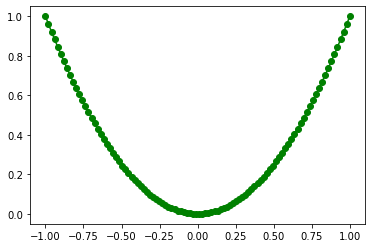

In [11]:
import matplotlib.pyplot as plt

def plot_f(f, x, **kwargs):
    """
    plots f(x)
    
    passes keyword arguments to plt.plot()
    """
    y = f(x)
    return plt.plot(x, y, **kwargs)

def f(x):
    return x**2

x = np.linspace(-1,1,100)

plot_f(f, x, color='g', marker='o')
plt.show()

A good way to extract keyword arguments from `kwargs` is to use the `get` method for Python dictionaries

In [ ]:
dict.get?

In [12]:
def myfun(*args, **kwargs):
    """
    extract the "message" keyword
    """
    m = kwargs.get("message", "hello")    # kwargs.get('name',"default value (if there's no name)")
    print(m)   
    return m

myfun()

myfun(message="goodbye")

hello
goodbye


'goodbye'

## Helper Functions

You can define helper functions inside the definition of a function

In [13]:
def alternate(x):
    """
    returns -x if x is odd, x if x is even
    """
    def is_odd(x):
        """
        returns true if x is odd
        """
        return x % 2 == 1 # % is mod operator
    
    # we now return to the function alternate
    if is_odd(x):
        return -x
    else:
        return x
    
for i in range(5):
    print("{:+d}".format(alternate(i)))
    

+0
-1
+2
-3
+4


## Lambda Functions

A Lambda Function is an [anonymous function](https://en.wikipedia.org/wiki/Anonymous_function), meaning you don't give it a name e.g. by declaring it in a `def` block.

In [14]:
f = lambda x : x*x
f(2)

4

lambda functions (and the [lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus)) play an important role in the theory of computing.  They can be found in a many languages other than Python.

The semantics of a lambda function are very similar to a function declared using `def`. E.g.:

`f = lambda *args : outputs` is similar to

In [ ]:
def f(*args):
    return #function of args

In [15]:
# here's the plus_times function we defined earlier
(lambda x, y : (x + y, x * y))(3,2)

(5, 6)

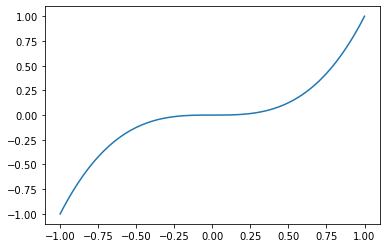

In [16]:
# using a lambda function in our plotting function
plot_f(lambda x: x**3, np.linspace(-1,1,100))
plt.show()

## Exercises

1. Define a lambda function that acts as the identity on input arguments

In [ ]:
## your code here


In [17]:
I = lambda *args : args

2. Define a function that plots a 2-dimensionsional function using `plt.imshow`.  Pass along keyword arguments to the `imshow` function

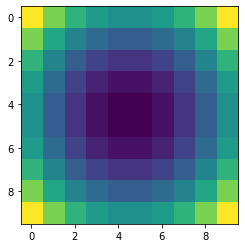

In [18]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def plot2D(f, n, l, **kwargs):
    
    #n: number of grid points
    #l: the boundary of the domain
    
    x, y = np.meshgrid(np.linspace(-l, l, n), np.linspace(-l, l, n))
    return plt.imshow(f(x, y), **kwargs)
    
    
f = lambda x, y : x**2 + y**2

plot2D(f, 10, 1)

3. Define a function that computes the sum of its arguments

In [ ]:
# your code here


In [ ]:
def sumfun(*args):
    return sum(args)

sumfun(1,2,3)